In [1]:
# Importa la librería pandas para manejo de datos y otras utilidades
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
# Lee el archivo CSV y lo carga en un DataFrame llamado 'data', parseando la columna 'Timestamp' como fechas
data = pandas.read_csv("./reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating Average/count by day

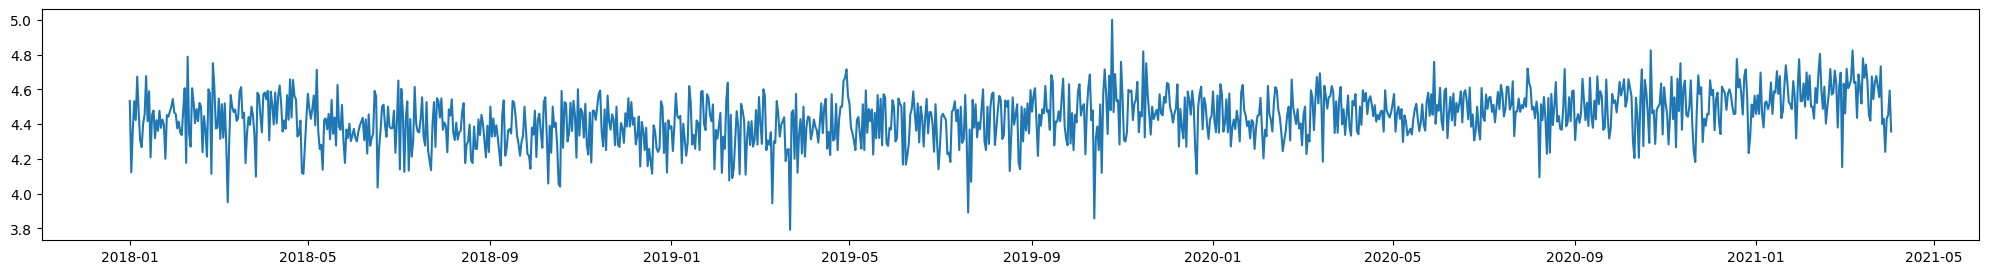

In [9]:
data['Day'] = data['Timestamp'].dt.date  # Añade una columna con solo la fecha
day_average = data.groupby(['Day']).mean(numeric_only=True)  # Agrupa por día y calcula la media solo de columnas numéricas
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])  # Muestra el resultado

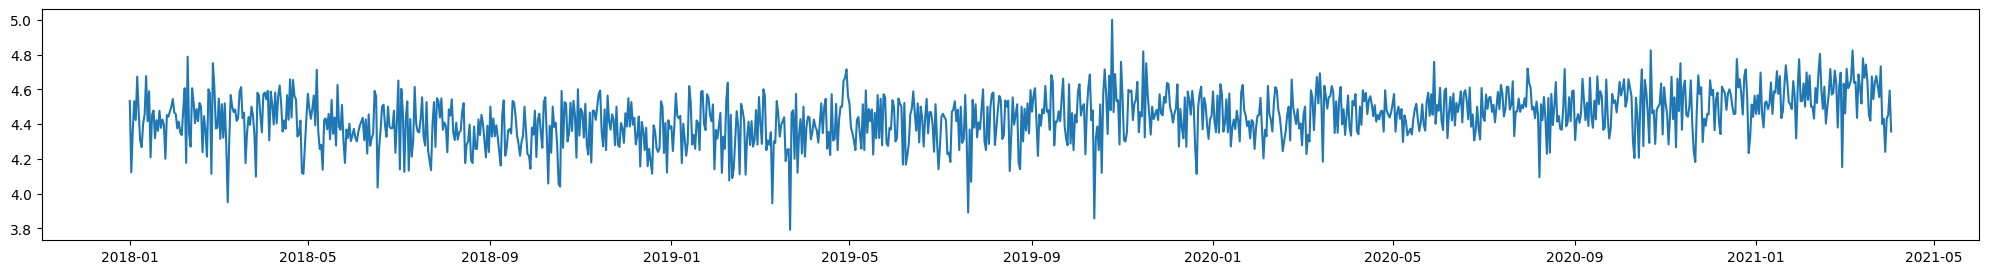

In [10]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])  # Muestra el resultado

### Rating average by week

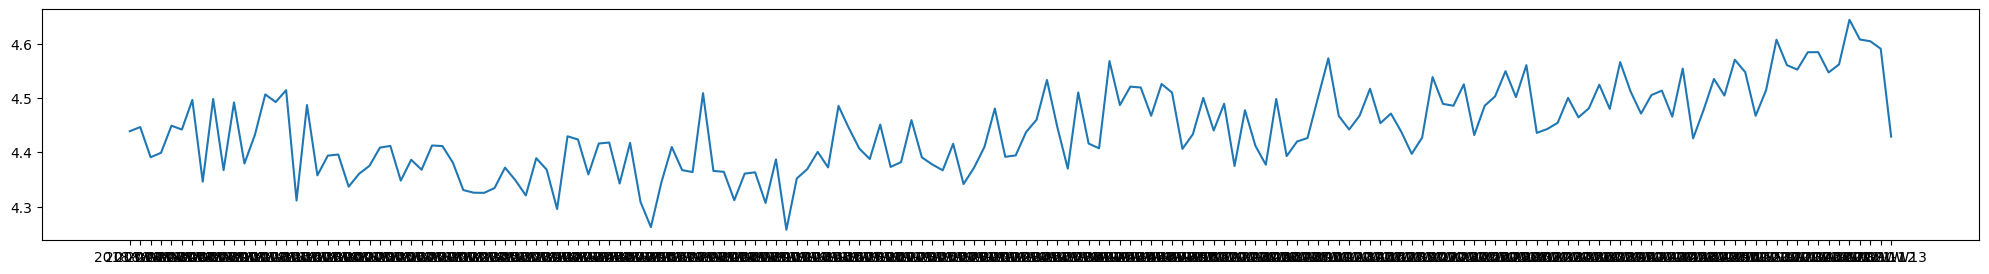

In [34]:
# Añade columnas de año y semana ISO
data['Year'] = data['Timestamp'].dt.isocalendar().year
data['Week'] = data['Timestamp'].dt.isocalendar().week

# Calcula el promedio semanal
week_average = data.groupby(['Year', 'Week']).mean(numeric_only=True)


week_average.index = week_average.index.map(lambda x: f"{x[0]}-W{x[1]:02d}")

# Grafica el promedio de rating por semana
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])


### Average rating by month

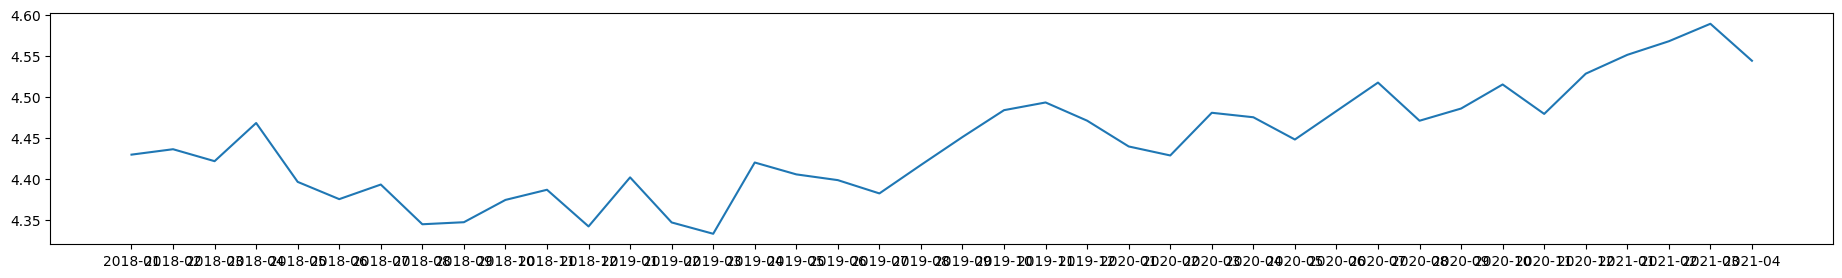

In [92]:
# Añade columnas de año y mes
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month

# Calcula el promedio mensual
month_average = data.groupby(['Year', 'Month']).mean(numeric_only=True)

# Opcional: crea un índice legible tipo "2024-05"
month_average.index = month_average.index.map(lambda x: f"{x[0]}-{x[1]:02d}")

# Grafica el promedio de rating por mes
plt.figure(figsize=(23, 3))
plt.plot(month_average.index, month_average['Rating'])


### Average rating by moth by course

<Axes: xlabel='Month'>

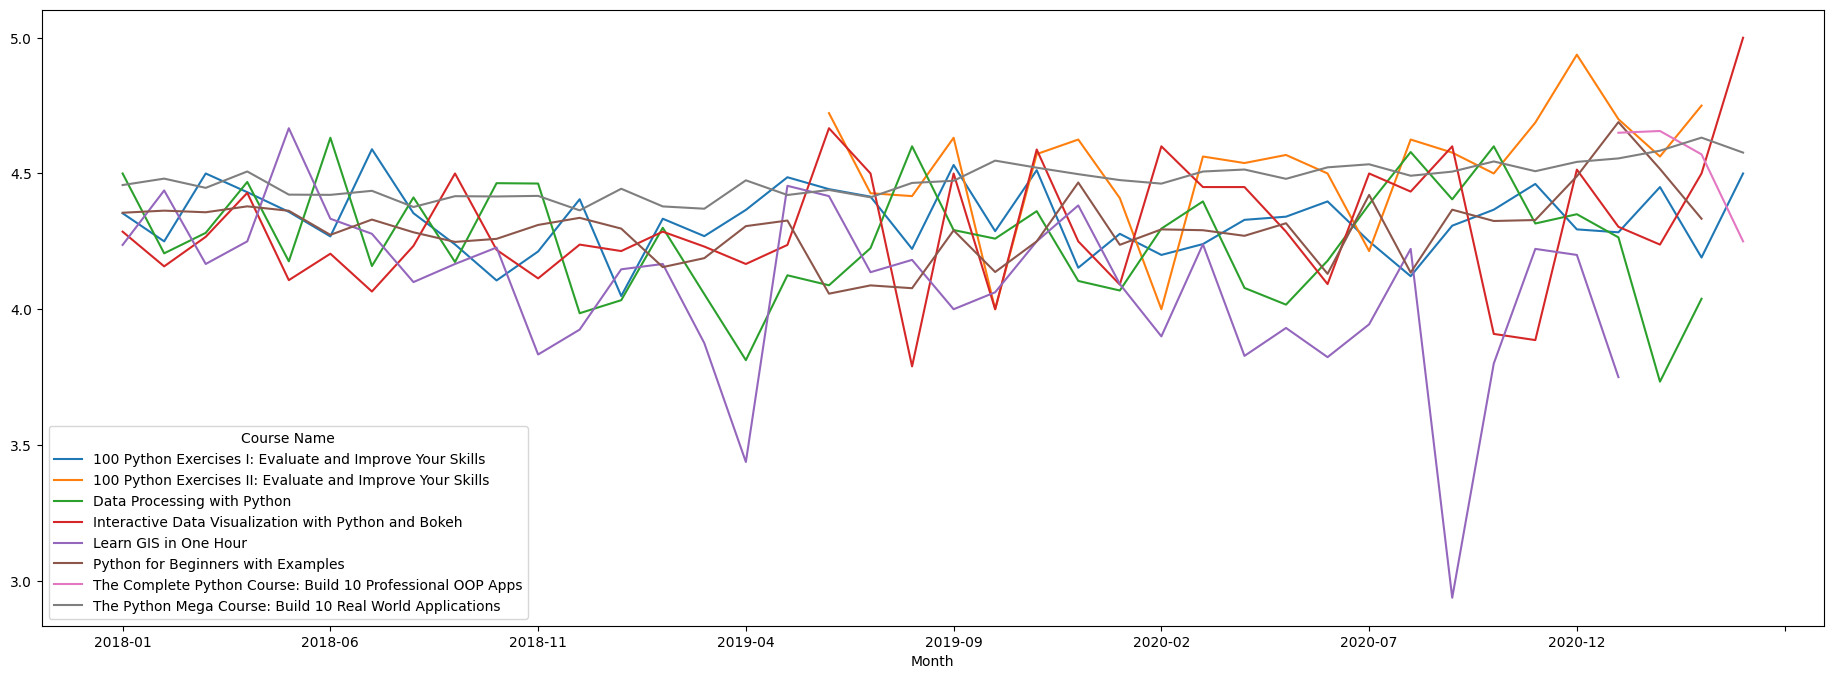

In [61]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(23,8))

<Axes: xlabel='Month'>

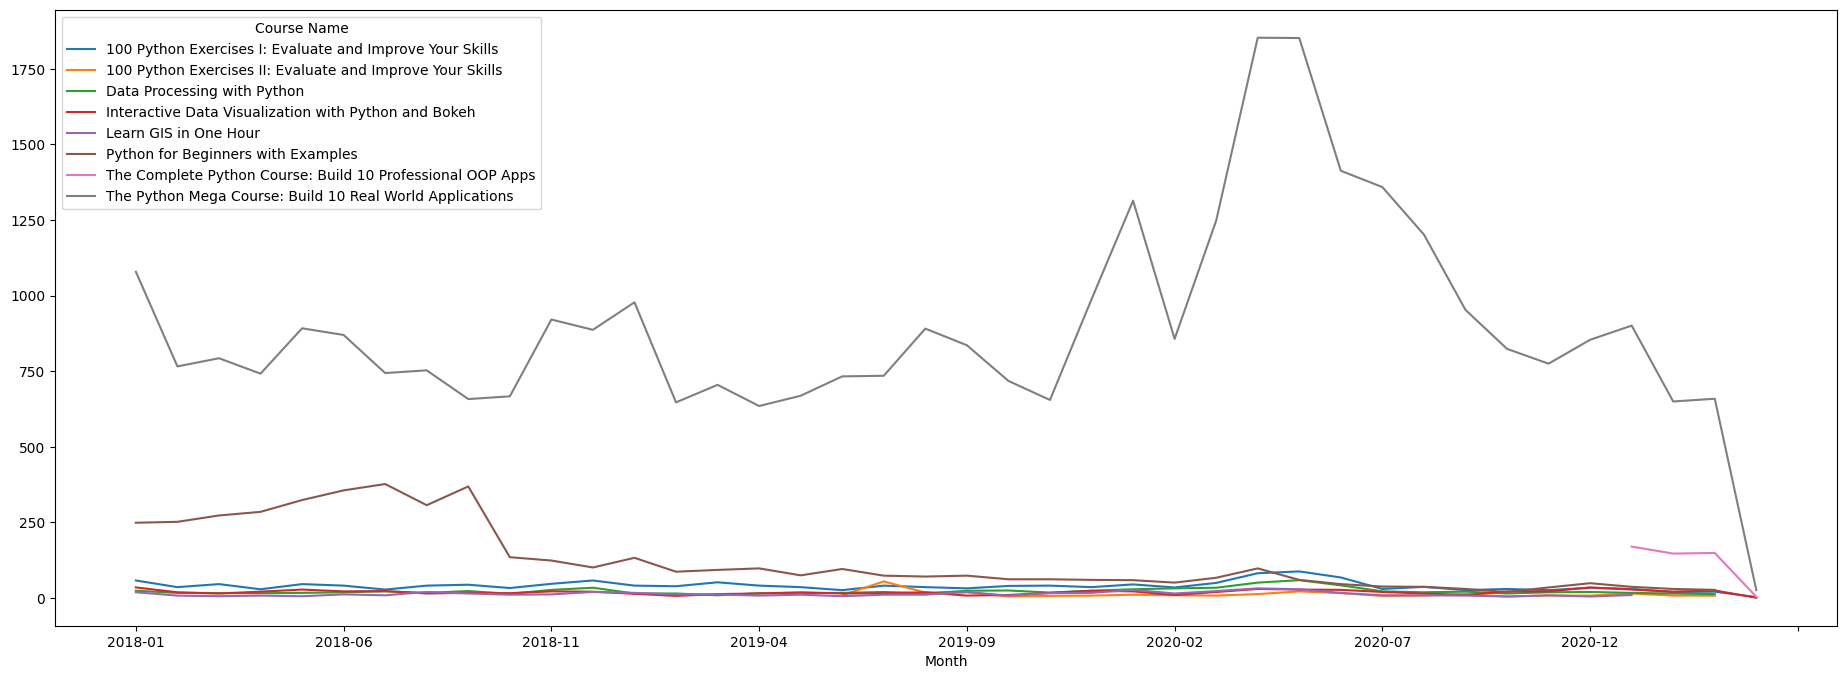

In [89]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(23,8))

### What Day of the Week are People the Happiest?

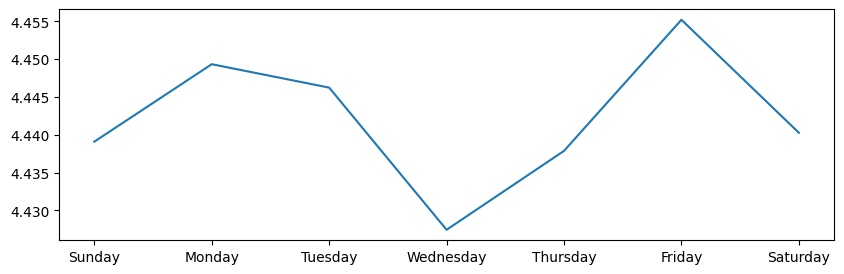

In [87]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w').astype(int)

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean(numeric_only=True)
weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize=(10,3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])


### Number of rating by course

In [95]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x237ac53b260>,
 [Text(1.093204501902345, 0.12208159984389857, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539490063081, 0.26357989832654555, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237467267586, 0.3482339511976009, 'Data Processing with Python'),
  Text(0.9969710233917297, 0.4648104759116852, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514243624985, 0.5509973551382421, 'Learn GIS in One Hour'),
  Text(0.6871673546107159, 0.8589534485391574, 'Python for Beginners with Examples'),
  Text(0.3307029829407597, 1.0491117848323332, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.876275637740144, -0.6649368441461971, 'The Python Mega Course: Build 10 Real World Applications')])

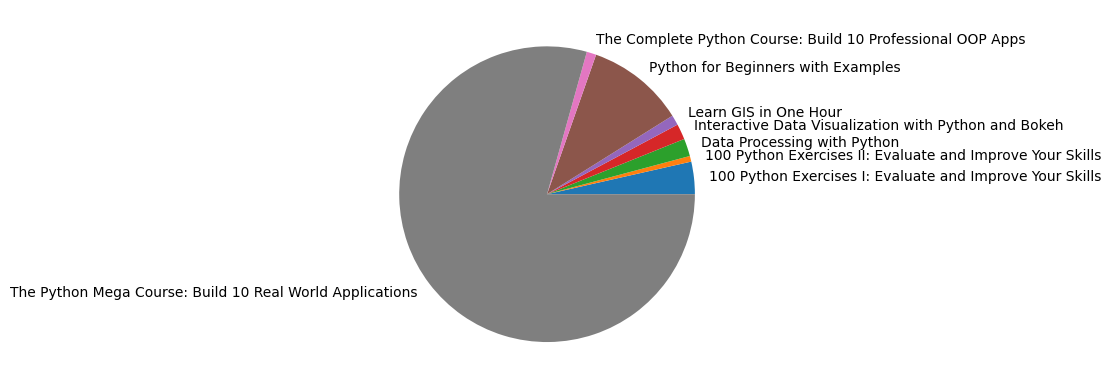

In [97]:
plt.pie(share, labels=share.index)